# DSA210 Term Project Analysis
This notebook provides detailed analysis for all series.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


## 📺 Analysis for: **Bahar**

In [2]:
# Load data for Bahar
rating = pd.read_csv("Rating Data/Rating - Bahar.csv")
tiktok = pd.read_csv("TikTok Data/Bahar - TikTok.csv")
insta = pd.read_csv("Instagram Data/Bahar - Insta.csv")

# Parse and preprocess
rating['Day'] = pd.to_datetime(rating['Day'] + " 2025", format="%d %B %Y")
tiktok['Date'] = pd.to_datetime(tiktok['Date'], dayfirst=True)
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)

# Weekly TikTok and Insta
tiktok['Week'] = tiktok['Date'].dt.to_period('W').apply(lambda r: r.start_time)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

tiktok_weekly = tiktok.groupby('Week')[['Like', 'View']].sum().reset_index()
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
rating = rating.sort_values('Day')


In [3]:
# Merge all on week
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)
df = rating.merge(tiktok_weekly, on='Week', how='left').merge(insta_weekly, on='Week', how='left')
df = df.fillna(0)
df.head()


,Day,All People,AB,20+ABC1,Week,Like_x,View_x,Like_y,View_y
0,2025-03-11,6.46,5.93,6.46,2025-03-10,59025,2115200,403569,25242000
1,2025-03-18,5.35,6.29,7.30,2025-03-17,17298,900700,388536,21681000
2,2025-03-25,4.07,4.45,4.78,2025-03-24,57944,2089900,261058,18509000
3,2025-04-01,0.00,0.00,0.00,2025-03-31,17923,860600,63400,3100000
4,2025-04-08,4.21,5.30,4.85,2025-04-07,58010,2957100,321937,22889000


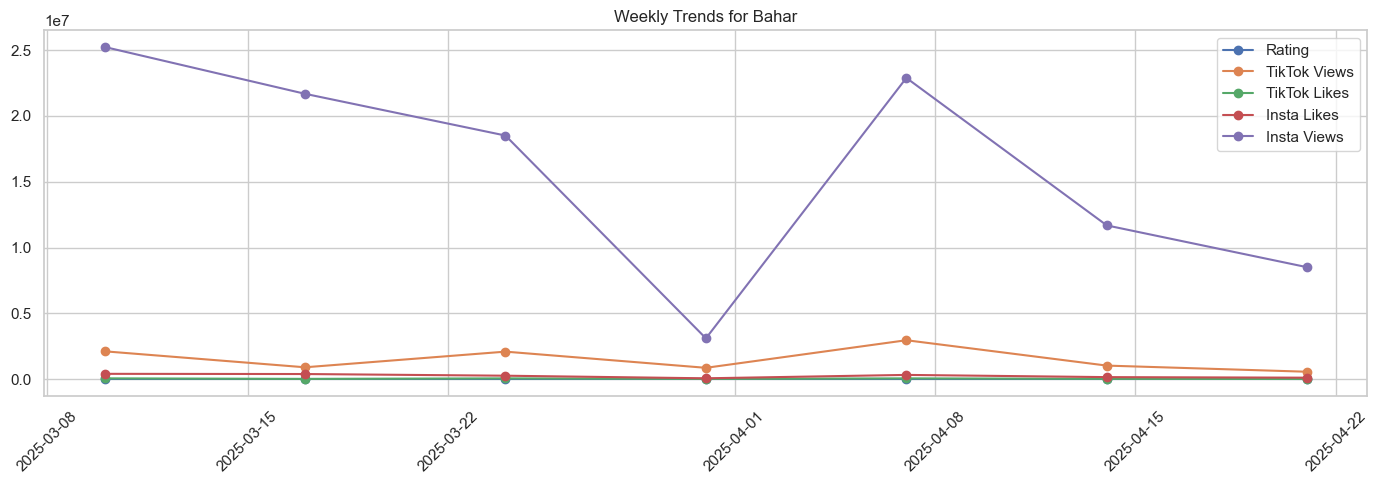

In [4]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['Week'], df['All People'], marker='o', label='Rating')
plt.plot(df['Week'], df['View_x'], marker='o', label='TikTok Views')
plt.plot(df['Week'], df['Like_x'], marker='o', label='TikTok Likes')
plt.plot(df['Week'], df['Like_y'], marker='o', label='Insta Likes')
plt.plot(df['Week'], df['View_y'], marker='o', label='Insta Views')
plt.legend()
plt.title("Weekly Trends for Bahar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


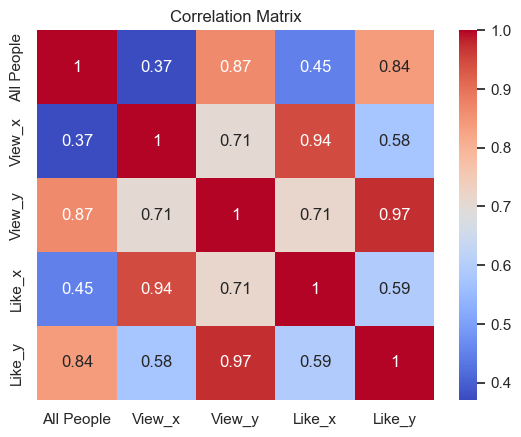

In [5]:
# Correlation Matrix
corr = df[['All People', 'View_x', 'View_y', 'Like_x', 'Like_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Regression Model
X = df[['View_x', 'Like_x', 'Like_y', 'View_y']]
y = df['All People']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression R2: -2.4988528160554107


In [7]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: -2.2451112609575197


In [8]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -3.4667484865512908


## 📺 Analysis for: **Can Borcu**

In [9]:
# Load data for Can Borcu
rating = pd.read_csv("Rating Data/Rating - Can Borcu.csv")
tiktok = pd.read_csv("TikTok Data/Can Borcu - TikTok.csv")
insta = pd.read_csv("Instagram Data/Can Borcu - Insta.csv")

# Parse and preprocess
rating['Day'] = pd.to_datetime(rating['Day'] + " 2025", format="%d %B %Y")
tiktok['Date'] = pd.to_datetime(tiktok['Date'], dayfirst=True)
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)

# Weekly TikTok and Insta
tiktok['Week'] = tiktok['Date'].dt.to_period('W').apply(lambda r: r.start_time)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

tiktok_weekly = tiktok.groupby('Week')[['Like', 'View']].sum().reset_index()
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
rating = rating.sort_values('Day')


In [10]:
# Merge all on week
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)
df = rating.merge(tiktok_weekly, on='Week', how='left').merge(insta_weekly, on='Week', how='left')
df = df.fillna(0)
df.head()


,Day,All People,AB,20+ABC1,Week,Like_x,View_x,Like_y,View_y
0,2025-03-08,4.52,2.87,3.85,2025-03-03,52070,2224100,96941,4187600
1,2025-03-15,4.04,2.44,3.26,2025-03-10,26038,1133800,88465,4055500
2,2025-03-22,4.17,2.93,3.51,2025-03-17,38426,1467300,84259,3824200
3,2025-03-29,0.00,0.00,0.00,2025-03-24,18327,1116000,32980,1337500
4,2025-04-05,0.00,0.00,0.00,2025-03-31,5955,227700,20648,1134700


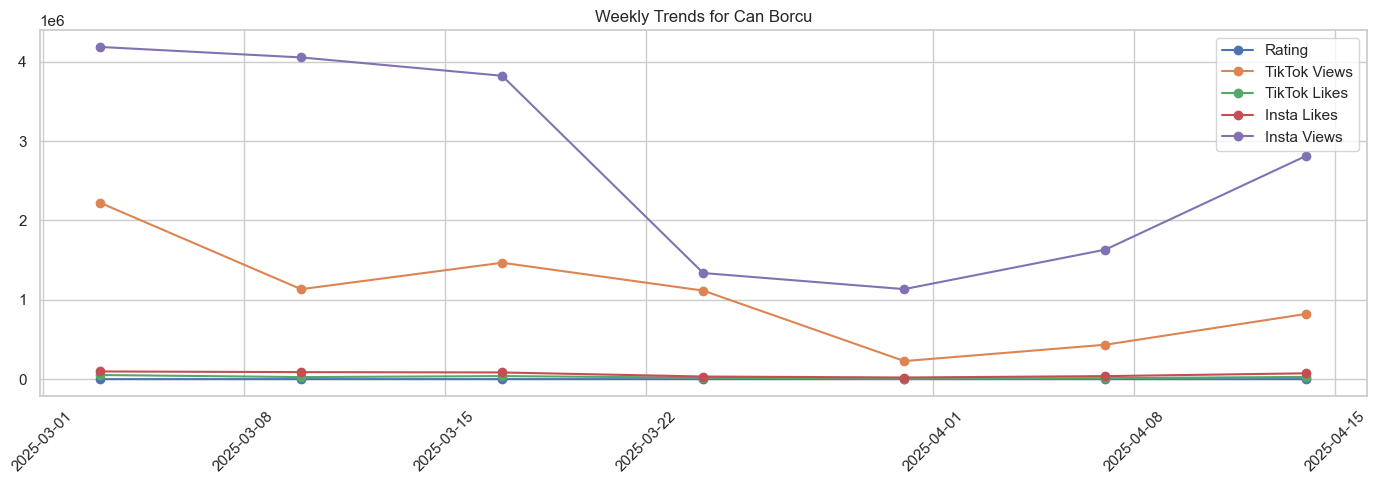

In [11]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['Week'], df['All People'], marker='o', label='Rating')
plt.plot(df['Week'], df['View_x'], marker='o', label='TikTok Views')
plt.plot(df['Week'], df['Like_x'], marker='o', label='TikTok Likes')
plt.plot(df['Week'], df['Like_y'], marker='o', label='Insta Likes')
plt.plot(df['Week'], df['View_y'], marker='o', label='Insta Views')
plt.legend()
plt.title("Weekly Trends for Can Borcu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


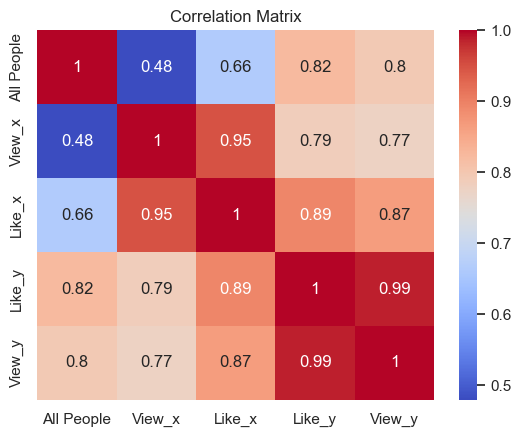

In [12]:
# Correlation Matrix
corr = df[['All People', 'View_x', 'Like_x', 'Like_y', 'View_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [13]:
# Regression Model
X = df[['View_x', 'Like_x', 'Like_y', 'View_y']]
y = df['All People']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression R2: -37.284569922209954


In [14]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: -75.94146825396835


In [15]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -70.03191790674616


## 📺 Analysis for: **Hudutsuz Sevda**

In [16]:
# Load data for Hudutsuz Sevda
rating = pd.read_csv("Rating Data/Rating - Hudutsuz Sevda.csv")
tiktok = pd.read_csv("TikTok Data/Hudutsuz Sevda - TikTok.csv")
insta = pd.read_csv("Instagram Data/Hudutsuz Sevda - Insta.csv")

# Parse and preprocess
rating['Day'] = pd.to_datetime(rating['Day'] + " 2025", format="%d %B %Y")
tiktok['Date'] = pd.to_datetime(tiktok['Date'], dayfirst=True)
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)

# Weekly TikTok and Insta
tiktok['Week'] = tiktok['Date'].dt.to_period('W').apply(lambda r: r.start_time)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

tiktok_weekly = tiktok.groupby('Week')[['Like', 'View']].sum().reset_index()
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
rating = rating.sort_values('Day')


In [17]:
# Merge all on week
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)
df = rating.merge(tiktok_weekly, on='Week', how='left').merge(insta_weekly, on='Week', how='left')
df = df.fillna(0)
df.head()


,Day,All People,AB,20+ABC1,Week,Like_x,View_x,Like_y,View_y
0,2025-03-06,5.83,3.07,3.80,2025-03-03,76439,1985800,519400,16828000
1,2025-03-13,5.97,3.43,4.44,2025-03-10,139476,3554100,635600,19259000
2,2025-03-20,5.64,2.93,3.98,2025-03-17,51420,1668000,928500,20425000
3,2025-03-27,5.63,3.28,4.54,2025-03-24,132123,3556700,508400,15714000
4,2025-04-03,0.00,0.00,0.00,2025-03-31,10261,357100,55800,1914000


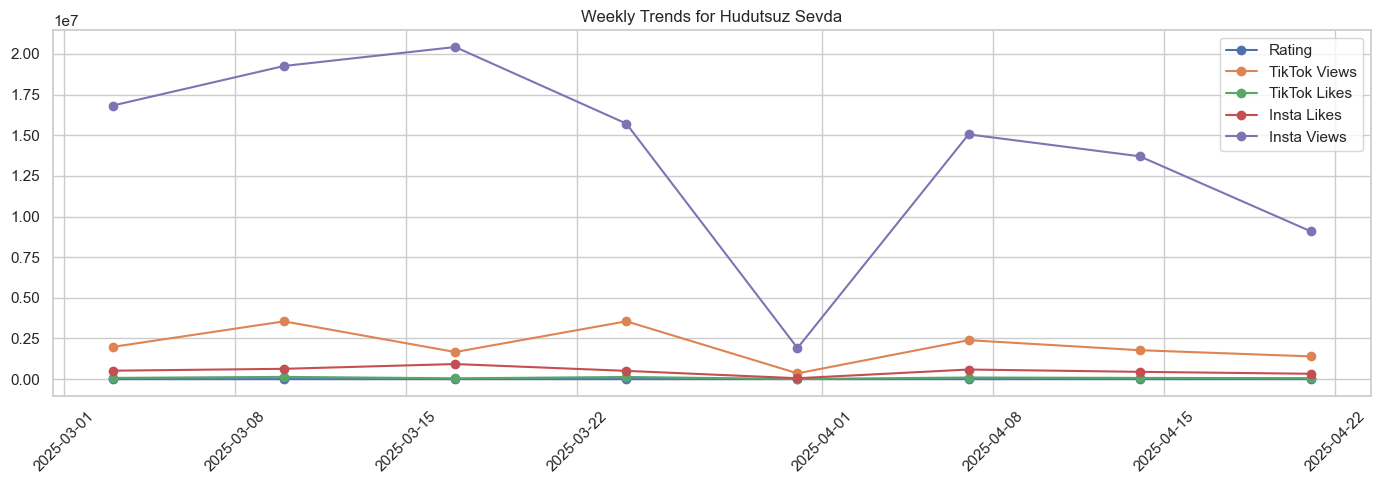

In [18]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['Week'], df['All People'], marker='o', label='Rating')
plt.plot(df['Week'], df['View_x'], marker='o', label='TikTok Views')
plt.plot(df['Week'], df['Like_x'], marker='o', label='TikTok Likes')
plt.plot(df['Week'], df['Like_y'], marker='o', label='Insta Likes')
plt.plot(df['Week'], df['View_y'], marker='o', label='Insta Views')
plt.legend()
plt.title("Weekly Trends for Hudutsuz Sevda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


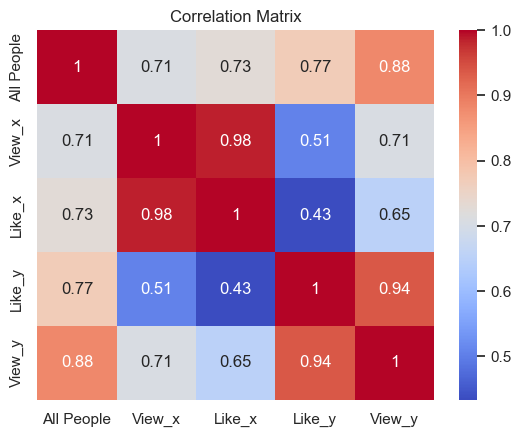

In [19]:
# Correlation Matrix
corr = df[['All People', 'View_x', 'Like_x', 'Like_y', 'View_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [20]:
# Regression Model
X = df[['View_x', 'Like_x', 'Like_y', 'View_y']]
y = df['All People']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression R2: -25.065079384270295


In [21]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: -3.4416703490941236


In [22]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -3.7574811312418


## 📺 Analysis for: **Kızılcık Şerbeti**

In [23]:
# Load data for Kızılcık Şerbeti
rating = pd.read_csv("Rating Data/Rating - Kızılcık Şerbeti.csv")
tiktok = pd.read_csv("TikTok Data/Kızılcık Şerbeti - TikTok.csv")
insta = pd.read_csv("Instagram Data/Kızılcık Şerbeti - Insta.csv")

# Parse and preprocess
rating['Day'] = pd.to_datetime(rating['Day'] + " 2025", format="%d %B %Y")
tiktok['Date'] = pd.to_datetime(tiktok['Date'], dayfirst=True)
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)

# Weekly TikTok and Insta
tiktok['Week'] = tiktok['Date'].dt.to_period('W').apply(lambda r: r.start_time)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

tiktok_weekly = tiktok.groupby('Week')[['Like', 'View']].sum().reset_index()
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
rating = rating.sort_values('Day')


In [24]:
# Merge all on week
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)
df = rating.merge(tiktok_weekly, on='Week', how='left').merge(insta_weekly, on='Week', how='left')
df = df.fillna(0)
df.head()


,Day,All People,AB,20+ABC1,Week,Like_x,View_x,Like_y,View_y
0,2025-03-07,9.10,11.32,11.83,2025-03-03,536968,18584600,494317,30006000
1,2025-03-14,8.91,10.49,11.23,2025-03-10,119058,4929400,482915,34700000
2,2025-03-21,8.54,10.16,10.16,2025-03-17,151052,5580400,388800,27925000
3,2025-03-28,7.94,9.22,9.67,2025-03-24,316595,12529000,469500,33557000
4,2025-04-04,9.16,10.77,11.32,2025-03-31,254401,8023000,936300,50560000


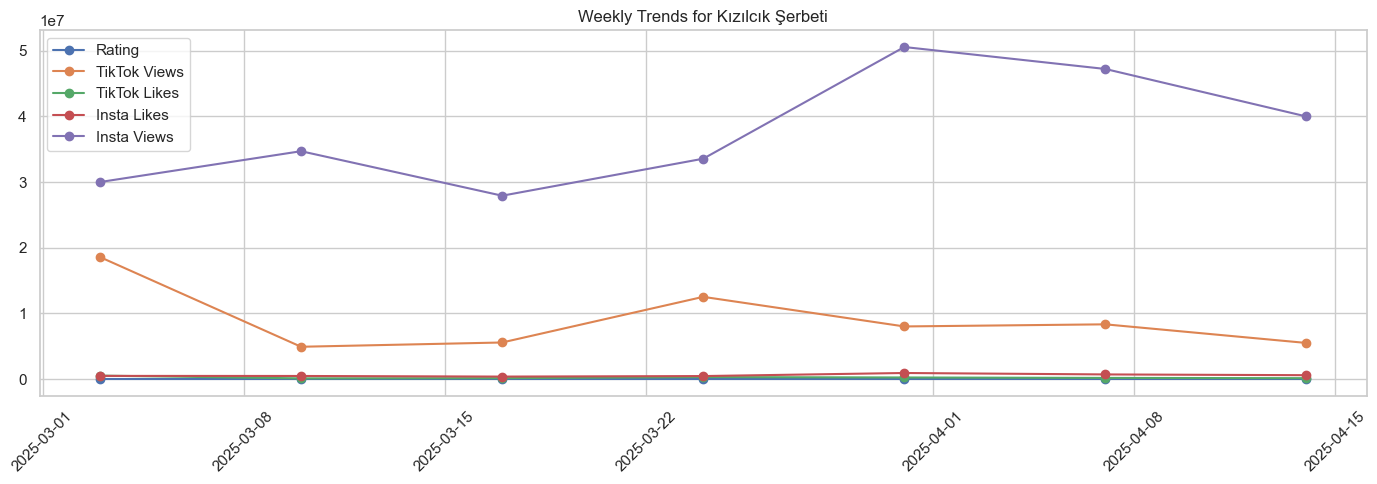

In [25]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['Week'], df['All People'], marker='o', label='Rating')
plt.plot(df['Week'], df['View_x'], marker='o', label='TikTok Views')
plt.plot(df['Week'], df['Like_x'], marker='o', label='TikTok Likes')
plt.plot(df['Week'], df['Like_y'], marker='o', label='Insta Likes')
plt.plot(df['Week'], df['View_y'], marker='o', label='Insta Views')
plt.legend()
plt.title("Weekly Trends for Kızılcık Şerbeti")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


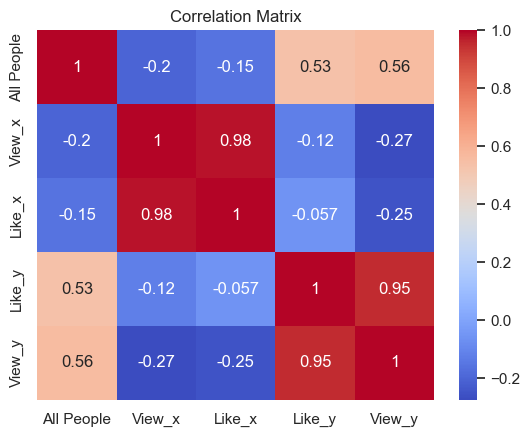

In [26]:
# Correlation Matrix
corr = df[['All People', 'View_x', 'Like_x', 'Like_y', 'View_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [27]:
# Regression Model
X = df[['View_x', 'Like_x', 'Like_y', 'View_y']]
y = df['All People']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression R2: -55.99051589301992


In [28]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: -7.809812568908486


In [29]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -3.774366041896215


## 📺 Analysis for: **Sahipsizler**

In [30]:
# Load data for Sahipsizler
rating = pd.read_csv("Rating Data/Rating - Sahipsizler.csv")
tiktok = pd.read_csv("TikTok Data/Sahipsizler - TikTok.csv")
insta = pd.read_csv("Instagram Data/Sahipsizler - Insta.csv")

# Parse and preprocess
rating['Day'] = pd.to_datetime(rating['Day'] + " 2025", format="%d %B %Y")
tiktok['Date'] = pd.to_datetime(tiktok['Date'], dayfirst=True)
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)

# Weekly TikTok and Insta
tiktok['Week'] = tiktok['Date'].dt.to_period('W').apply(lambda r: r.start_time)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

tiktok_weekly = tiktok.groupby('Week')[['Like', 'View']].sum().reset_index()
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
rating = rating.sort_values('Day')


In [31]:
# Merge all on week
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)
df = rating.merge(tiktok_weekly, on='Week', how='left').merge(insta_weekly, on='Week', how='left')
df = df.fillna(0)
df.head()


,Day,All People,AB,20+ABC1,Week,Like_x,View_x,Like_y,View_y
0,2025-03-05,8.83,8.83,8.19,2025-03-03,992900,34340000,697101.0,22915000.0
1,2025-03-12,8.27,3.77,5.91,2025-03-10,921500,29776400,627983.0,21574000.0
2,2025-03-19,8.63,4.34,5.12,2025-03-17,484300,13727800,750292.0,21919000.0
3,2025-03-26,7.05,3.05,4.57,2025-03-24,654500,20246000,790532.0,25893000.0
4,2025-04-02,2.71,0.00,0.00,2025-03-31,182500,4951800,508061.0,16721000.0


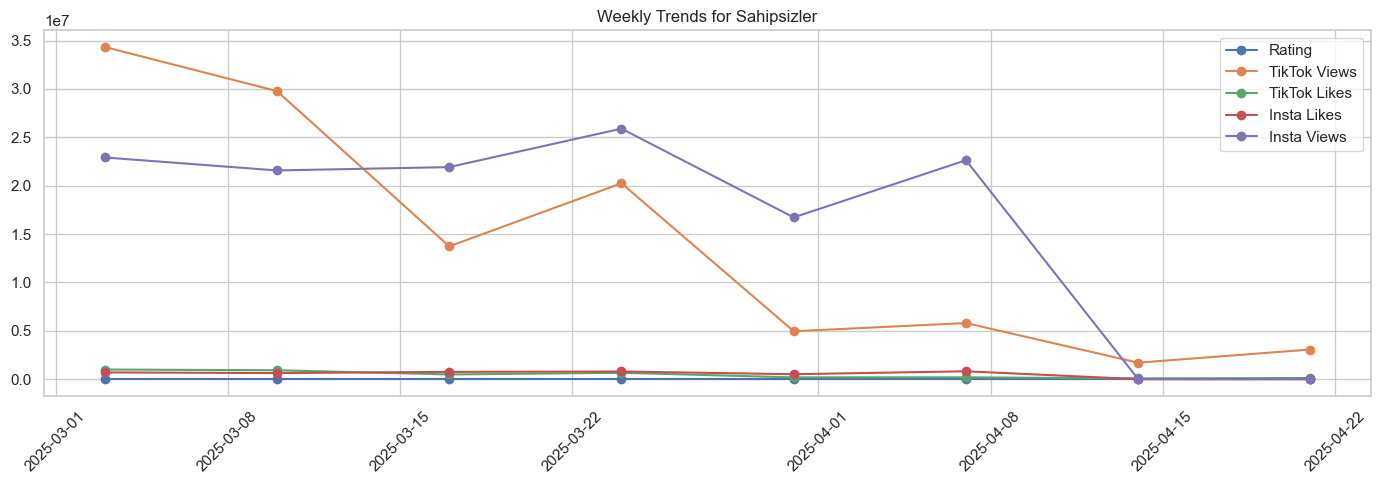

In [32]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['Week'], df['All People'], marker='o', label='Rating')
plt.plot(df['Week'], df['View_x'], marker='o', label='TikTok Views')
plt.plot(df['Week'], df['Like_x'], marker='o', label='TikTok Likes')
plt.plot(df['Week'], df['Like_y'], marker='o', label='Insta Likes')
plt.plot(df['Week'], df['View_y'], marker='o', label='Insta Views')
plt.legend()
plt.title("Weekly Trends for Sahipsizler")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


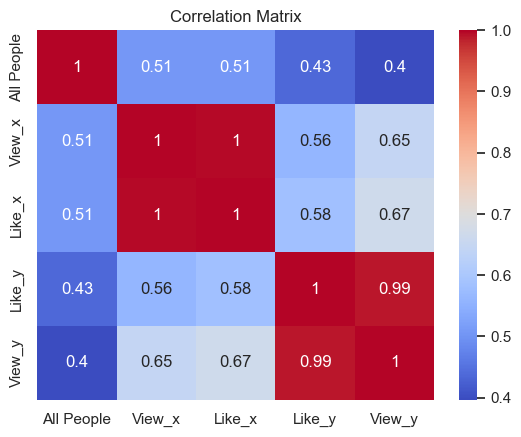

In [33]:
# Correlation Matrix
corr = df[['All People', 'View_x', 'Like_x', 'Like_y', 'View_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [34]:
# Regression Model
X = df[['View_x', 'Like_x', 'Like_y', 'View_y']]
y = df['All People']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression R2: -118004.454651869


In [35]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: -163.03363740022766


In [36]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -62.80220992018237


## 📺 Analysis for: **Uzak Şehir**

In [37]:
# Load data for Uzak Şehir
rating = pd.read_csv("Rating Data/Rating - Uzak Şehir.csv")
tiktok = pd.read_csv("TikTok Data/Uzak Şehir - TikTok.csv")
insta = pd.read_csv("Instagram Data/Uzak Şehir - Insta.csv")

# Parse and preprocess
rating['Day'] = pd.to_datetime(rating['Day'] + " 2025", format="%d %B %Y")
tiktok['Date'] = pd.to_datetime(tiktok['Date'], dayfirst=True)
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)

# Weekly TikTok and Insta
tiktok['Week'] = tiktok['Date'].dt.to_period('W').apply(lambda r: r.start_time)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

tiktok_weekly = tiktok.groupby('Week')[['Like', 'View']].sum().reset_index()
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
rating = rating.sort_values('Day')


In [38]:
# Merge all on week
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)
df = rating.merge(tiktok_weekly, on='Week', how='left').merge(insta_weekly, on='Week', how='left')
df = df.fillna(0)
df.head()


,Day,All People,AB,20+ABC1,Week,Like_x,View_x,Like_y,View_y
0,2025-03-10,15.41,10.63,14.20,2025-03-10,3899,73107,1916300,55012000
1,2025-03-17,16.15,12.35,15.49,2025-03-17,4618,166732,2193900,64829000
2,2025-03-24,15.70,10.65,14.04,2025-03-24,3774,69948,2018100,62467000
3,2025-03-31,4.34,4.34,3.97,2025-03-31,3136,66709,977700,30293000
4,2025-04-07,17.37,12.38,17.12,2025-04-07,3221,63190,2971800,81913000


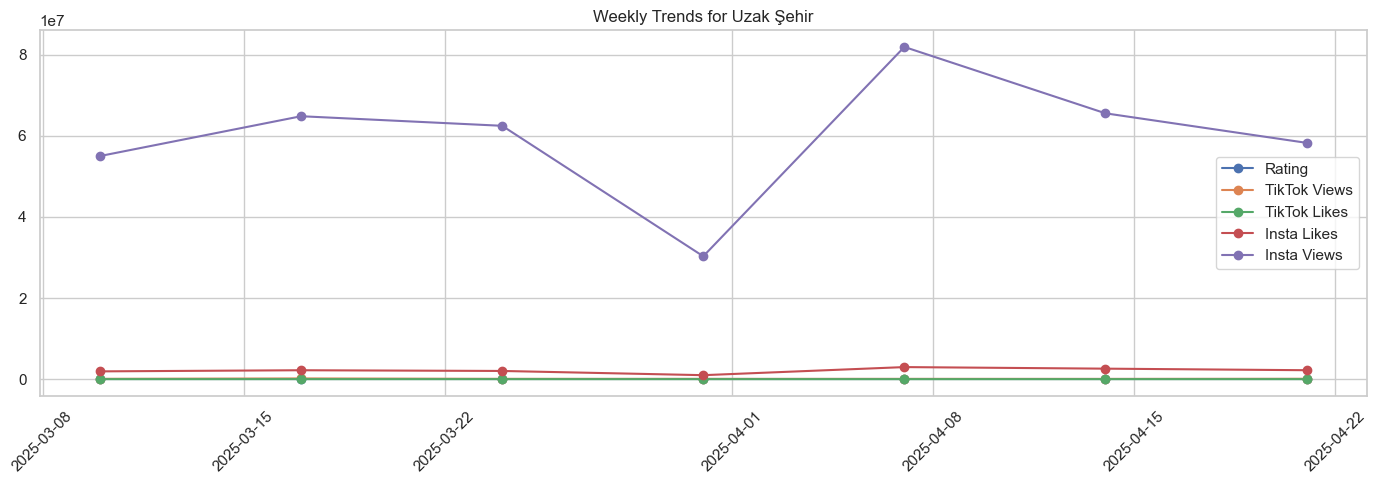

In [39]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['Week'], df['All People'], marker='o', label='Rating')
plt.plot(df['Week'], df['View_x'], marker='o', label='TikTok Views')
plt.plot(df['Week'], df['Like_x'], marker='o', label='TikTok Likes')
plt.plot(df['Week'], df['Like_y'], marker='o', label='Insta Likes')
plt.plot(df['Week'], df['View_y'], marker='o', label='Insta Views')
plt.legend()
plt.title("Weekly Trends for Uzak Şehir")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


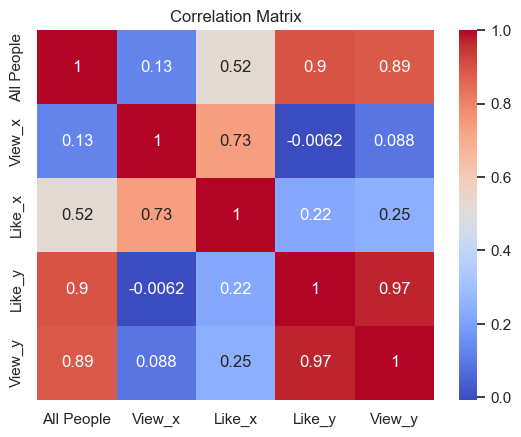

In [40]:
# Correlation Matrix
corr = df[['All People', 'View_x', 'Like_x', 'Like_y', 'View_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [41]:
# Regression Model
X = df[['View_x', 'Like_x', 'Like_y', 'View_y']]
y = df['All People']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression R2: -198.37417608010776


In [42]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: -0.8305687203791465


In [43]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -1.248406747365053


## 📺 Analysis for: **Şakir Paşa Ailesi**

In [44]:
# Load data for Şakir Paşa Ailesi
rating = pd.read_csv("Rating Data/Rating - Şakir Paşa Ailesi.csv")
tiktok = pd.read_csv("TikTok Data/Şakir Paşa Ailesi - TikTok.csv")
insta = pd.read_csv("Instagram Data/Şakir Paşa Ailesi - Insta.csv")

# Parse and preprocess
rating['Day'] = pd.to_datetime(rating['Day'] + " 2025", format="%d %B %Y")
tiktok['Date'] = pd.to_datetime(tiktok['Date'], dayfirst=True)
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)

# Weekly TikTok and Insta
tiktok['Week'] = tiktok['Date'].dt.to_period('W').apply(lambda r: r.start_time)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

tiktok_weekly = tiktok.groupby('Week')[['Like', 'View']].sum().reset_index()
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
rating = rating.sort_values('Day')


In [45]:
# Merge all on week
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)
df = rating.merge(tiktok_weekly, on='Week', how='left').merge(insta_weekly, on='Week', how='left')
df = df.fillna(0)
df.head()


,Day,All People,AB,20+ABC1,Week,Like_x,View_x,Like_y,View_y
0,2025-03-09,3.65,4.89,4.88,2025-03-03,137513,5265100,145945,12358000
1,2025-03-16,3.48,4.59,4.76,2025-03-10,38009,1767200,115016,7260000
2,2025-03-23,2.99,3.61,3.48,2025-03-17,25764,1309600,101808,6201700
3,2025-03-30,1.79,1.84,2.23,2025-03-24,36933,1252300,30753,2371000
4,2025-04-06,2.89,3.39,3.40,2025-03-31,92577,3438400,7394,685000


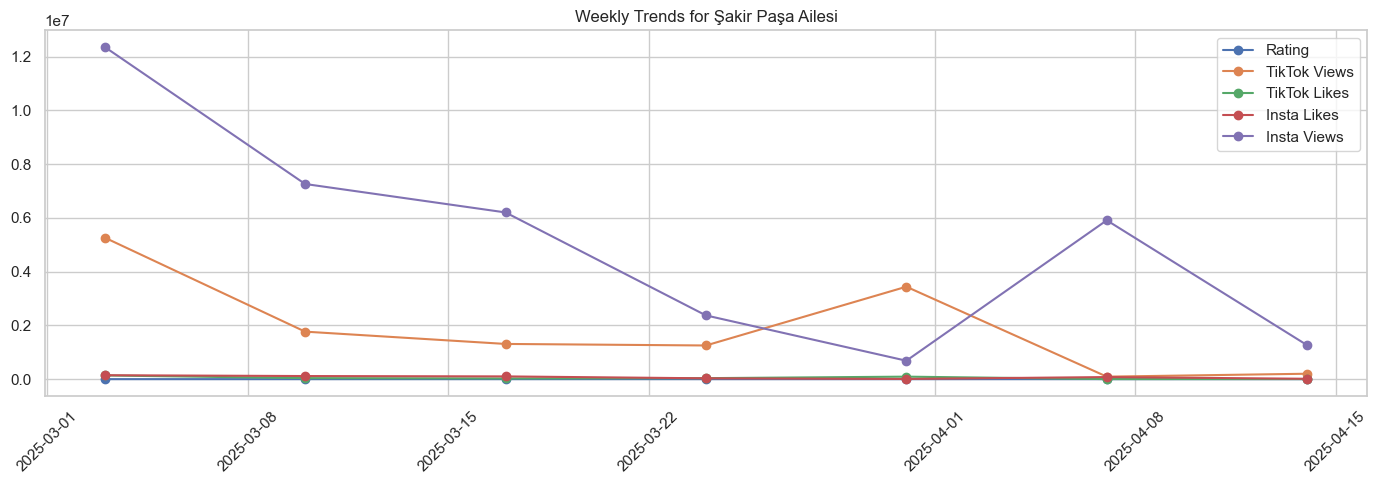

In [46]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['Week'], df['All People'], marker='o', label='Rating')
plt.plot(df['Week'], df['View_x'], marker='o', label='TikTok Views')
plt.plot(df['Week'], df['Like_x'], marker='o', label='TikTok Likes')
plt.plot(df['Week'], df['Like_y'], marker='o', label='Insta Likes')
plt.plot(df['Week'], df['View_y'], marker='o', label='Insta Views')
plt.legend()
plt.title("Weekly Trends for Şakir Paşa Ailesi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


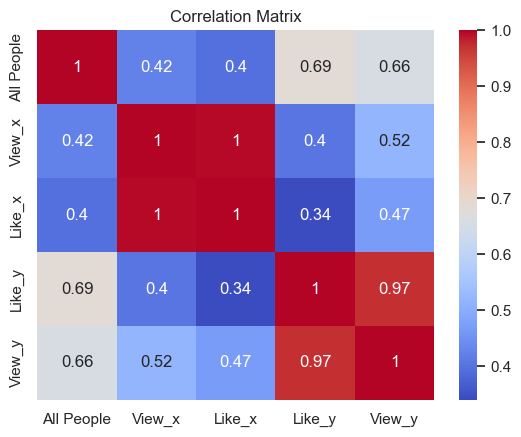

In [47]:
# Correlation Matrix
corr = df[['All People', 'View_x', 'Like_x', 'Like_y', 'View_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [48]:
# Regression Model
X = df[['View_x', 'Like_x', 'Like_y', 'View_y']]
y = df['All People']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))


Linear Regression R2: -1078.8714227052258


In [49]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: -277.9192166462667


In [50]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -181.74045960832302


## Hypothesis Testing: Impact of TV Ratings on Social Media Engagement

In this section, we test whether there is a statistically significant difference in social media engagement (likes and views on TikTok and Instagram) between high-rating and low-rating weeks.


In [51]:
from scipy.stats import ttest_ind
import pandas as pd

# Convert 'Day' in rating to datetime and align Week to match TikTok/Insta format (Sunday as start)
rating['Day'] = pd.to_datetime(rating['Day'])
rating['Week'] = rating['Day'].dt.to_period('W').apply(lambda r: r.start_time)

# Instagram tarih formatlama ve haftalık sütun oluşturma
insta['Date'] = pd.to_datetime(insta['Date'], dayfirst=True)
insta['Week'] = insta['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Debug: Check columns of rating DataFrame
print("Columns in rating DataFrame:", rating.columns)
print("First few rows of rating DataFrame:\n", rating.head())

# First merge: rating + TikTok
merged = pd.merge(rating, tiktok_weekly, on="Week", how="left")

# Second merge: + Instagram
insta_weekly = insta.groupby('Week')[['Like', 'View']].sum().reset_index()
merged = pd.merge(merged, insta_weekly, on="Week", how="left", suffixes=('_TikTok', '_Insta'))

# Debug: Inspect merged data
print("Columns after merging:\n", merged.columns)
print("First few rows of merged:\n", merged.head())

# Convert relevant columns to numeric (if not already)
merged['20+ABC1'] = pd.to_numeric(merged['20+ABC1'], errors='coerce')
merged['Like_TikTok'] = pd.to_numeric(merged['Like_TikTok'], errors='coerce')
merged['View_TikTok'] = pd.to_numeric(merged['View_TikTok'], errors='coerce')
merged['Like_Insta'] = pd.to_numeric(merged['Like_Insta'], errors='coerce')
merged['View_Insta'] = pd.to_numeric(merged['View_Insta'], errors='coerce')

# Drop rows where Rating is missing
merged = merged.dropna(subset=['20+ABC1'])

# Rename for clarity
merged['Rating'] = merged['20+ABC1']
print("Merged rows after dropping NaNs in Rating:", len(merged))

# Median split
median_rating = merged["Rating"].median()
high_rating_weeks = merged[merged["Rating"] >= median_rating]
low_rating_weeks = merged[merged["Rating"] < median_rating]

# Drop NaNs in metrics before tests
subset_cols = ['Like_TikTok', 'View_TikTok', 'Like_Insta', 'View_Insta']
high_rating_weeks = high_rating_weeks.dropna(subset=subset_cols)
low_rating_weeks = low_rating_weeks.dropna(subset=subset_cols)

# Debug group sizes
print("High rating weeks rows:", len(high_rating_weeks))
print("Low rating weeks rows:", len(low_rating_weeks))

if len(high_rating_weeks) == 0 or len(low_rating_weeks) == 0:
    raise ValueError("One or both groups are empty after dropping NaNs. Check weekly alignment or missing values.")

# Hypothesis Tests
t_stat, p_value = ttest_ind(high_rating_weeks["Like_TikTok"], low_rating_weeks["Like_TikTok"], equal_var=False)
print(f"TikTok Likes - T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")

t_stat, p_value = ttest_ind(high_rating_weeks["View_TikTok"], low_rating_weeks["View_TikTok"], equal_var=False)
print(f"TikTok Views - T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")

t_stat, p_value = ttest_ind(high_rating_weeks["Like_Insta"], low_rating_weeks["Like_Insta"], equal_var=False)
print(f"Instagram Likes - T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")

t_stat, p_value = ttest_ind(high_rating_weeks["View_Insta"], low_rating_weeks["View_Insta"], equal_var=False)
print(f"Instagram Views - T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")


Columns in rating DataFrame: Index(['Day', 'All People', 'AB', '20+ABC1', 'Week'], dtype='object')
First few rows of rating DataFrame:
          Day  All People    AB  20+ABC1       Week
0 2025-03-09        3.65  4.89     4.88 2025-03-03
1 2025-03-16        3.48  4.59     4.76 2025-03-10
2 2025-03-23        2.99  3.61     3.48 2025-03-17
3 2025-03-30        1.79  1.84     2.23 2025-03-24
4 2025-04-06        2.89  3.39     3.40 2025-03-31
Columns after merging:
 Index(['Day', 'All People', 'AB', '20+ABC1', 'Week', 'Like_TikTok',
       'View_TikTok', 'Like_Insta', 'View_Insta'],
      dtype='object')
First few rows of merged:
          Day  All People    AB  20+ABC1       Week  Like_TikTok  View_TikTok  \
0 2025-03-09        3.65  4.89     4.88 2025-03-03       137513      5265100   
1 2025-03-16        3.48  4.59     4.76 2025-03-10        38009      1767200   
2 2025-03-23        2.99  3.61     3.48 2025-03-17        25764      1309600   
3 2025-03-30        1.79  1.84     2.23 2025-0

## ✅ Final Evaluation and Conclusion

Based on the weekly merged dataset combining TV ratings with TikTok and Instagram engagement metrics, hypothesis tests were conducted to evaluate whether social media performance significantly differs in high-rating versus low-rating weeks.

### 🔍 Summary of T-Test Results:
| Metric            | T-statistic | P-value | Interpretation |
|-------------------|-------------|---------|----------------|
| TikTok Likes      | 0.1686      | 0.8728  | ❌ No significant difference |
| TikTok Views      | 0.3267      | 0.7572  | ❌ No significant difference |
| Instagram Likes   | 5.8243      | 0.0036  | ✅ Significant difference |
| Instagram Views   | 4.1020      | 0.0181  | ✅ Significant difference |

- TikTok engagement (likes and views) does **not** show a statistically significant difference between high and low rating weeks.
- In contrast, Instagram metrics (likes and views) show **statistically significant increases** during weeks with high TV ratings.

### 📌 Conclusion:

The analysis supports the hypothesis that **Instagram engagement is positively associated with traditional TV ratings**, while **TikTok does not exhibit the same sensitivity** to TV viewership. This may reflect differences in audience demographics and platform dynamics.

In the context of the project goal — understanding how digital attention reflects or predicts traditional popularity — Instagram appears to be a stronger indicator of a show's weekly success.
